## Error Analysis
Once a promising model is finalized, and we want to find ways to improve it. One way to do this is to analyze the types of errors it makes. So, this section shall cover error analysis for the multilabel classification we just discussed.

We start over the entire model building process again for review. Fetching the MNIST data.

In [1]:
# Fetching the MNIST dataset
from sklearn.datasets import fetch_mldata
import numpy as np
mnist = fetch_mldata("MNIST original")
# X = features and y = labels
X, y = mnist["data"], mnist["target"]

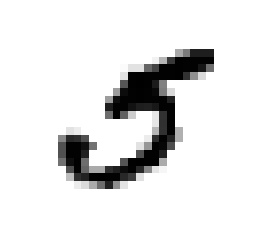

5.0

In [2]:
# Plotting a digit for test and storing 36000th digit in some_digit
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]   # Selecting the 36,000 image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[36000]

### Preparing the datasets

In [3]:
# Dividing the data into training and test dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Shuffling the training dataset
import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Forming the SGD Classifier, training the model and testing it with a test data

In [4]:
# Forming the SGD classifier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.

# Training the entire dataset for the multilabel scaler
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5

# Testing the model with some_digit
sgd_clf.predict([some_digit])
some_digit = X[36000]
y[36000]

5.0

## Running the model on the K Fold divided datasets using Cross Validation
First, we ned to look at the confusion matrix. We need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like we did earlier:

In [5]:
# Getting scaler to preprocess the input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Running the SGD classifier on the K fold dataset
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Calculating the confusion matrix for the training dataset
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   23,    8,   11,   43,   51,    8,   43,    4],
       [   1, 6472,   46,   25,    6,   45,    5,   12,  119,   11],
       [  47,   35, 5351,  101,   85,   24,   89,   53,  160,   13],
       [  47,   39,  136, 5359,    1,  223,   34,   54,  142,   96],
       [  14,   27,   40,   11, 5356,    8,   54,   33,   94,  205],
       [  65,   40,   36,  186,   68, 4610,  102,   32,  195,   87],
       [  30,   24,   45,    2,   45,   98, 5614,    5,   54,    1],
       [  25,   17,   74,   29,   54,   13,    6, 5798,   19,  230],
       [  45,  139,   68,  154,   10,  150,   57,   25, 5080,  123],
       [  39,   32,   30,   86,  167,   34,    2,  203,   88, 5268]], dtype=int64)

#### Plotting the confusion matrix
That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

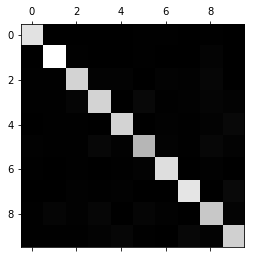

In [6]:
# Plotting the confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Calculating error rates instead of absoluter error and plotting
We need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad). We perform the normalization and plot the results again.

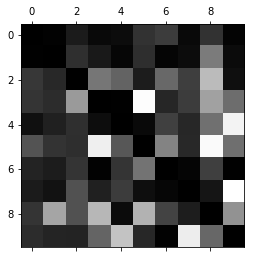

In [7]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### Observing the error plot and making inferences
There are several observations that can be made using the above plotted graph and the potential remedies to the source of error can also be identified. [Refer Slide# ]

## Multilabel Classification
This section will demonstrate multilabel classfication using the same MNIST data. This code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd.
The next lines create a KNeighborsClassifier instance (which supports multilabel classification, but not all classifiers do) and we train it using the multiple targets array.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now we can make a prediction, and notice that it outputs two labels for input digit 5. The digit 5 is indeed not large (False) and odd (True).

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on the project. For example, one approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes
the average F1 score across all labels:

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")